<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Load-and-inspect-the-data" data-toc-modified-id="1.-Load-and-inspect-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Load and inspect the data</a></span></li><li><span><a href="#2.-Exploratory-Data-Analysis" data-toc-modified-id="2.-Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Categorical Features</a></span></li><li><span><a href="#Numeric" data-toc-modified-id="Numeric-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Numeric</a></span></li></ul></li><li><span><a href="#3.-Preprocess-Data" data-toc-modified-id="3.-Preprocess-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Preprocess Data</a></span></li><li><span><a href="#Define-Pipeline" data-toc-modified-id="Define-Pipeline-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Define Pipeline</a></span></li><li><span><a href="#4.-Feature-Selection" data-toc-modified-id="4.-Feature-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>4. Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Recursive-Feature-Elimination-(RFE)" data-toc-modified-id="Recursive-Feature-Elimination-(RFE)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Recursive Feature Elimination (RFE)</a></span></li></ul></li><li><span><a href="#5.-Model-Selection" data-toc-modified-id="5.-Model-Selection-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>5. Model Selection</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Decision-Tree-Regressor" data-toc-modified-id="Decision-Tree-Regressor-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Decision Tree Regressor</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-6.0.2"><span class="toc-item-num">6.0.2&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#Extreme-Gradient-Regressor" data-toc-modified-id="Extreme-Gradient-Regressor-6.0.3"><span class="toc-item-num">6.0.3&nbsp;&nbsp;</span>Extreme Gradient Regressor</a></span></li><li><span><a href="#Extra-Trees-Regressor" data-toc-modified-id="Extra-Trees-Regressor-6.0.4"><span class="toc-item-num">6.0.4&nbsp;&nbsp;</span>Extra Trees Regressor</a></span></li><li><span><a href="#K-Nearest-Neighbor-Regressor" data-toc-modified-id="K-Nearest-Neighbor-Regressor-6.0.5"><span class="toc-item-num">6.0.5&nbsp;&nbsp;</span>K-Nearest Neighbor Regressor</a></span></li></ul></li></ul></li><li><span><a href="#6.-Model-Tuning" data-toc-modified-id="6.-Model-Tuning-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>6. Model Tuning</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#XGB-Regressor" data-toc-modified-id="XGB-Regressor-7.0.1"><span class="toc-item-num">7.0.1&nbsp;&nbsp;</span>XGB Regressor</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-7.0.2"><span class="toc-item-num">7.0.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Extra-Trees-Regressor" data-toc-modified-id="Extra-Trees-Regressor-7.0.3"><span class="toc-item-num">7.0.3&nbsp;&nbsp;</span>Extra Trees Regressor</a></span></li></ul></li></ul></li><li><span><a href="#7.-Prediction-on-Test-Set-for-Submission" data-toc-modified-id="7.-Prediction-on-Test-Set-for-Submission-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>7. Prediction on Test Set for Submission</a></span></li></ul></div>

Microsoft Capstone Project_2017- Predicting Student Loan Repayment Rate

This is the final project for the Microsoft Data Science Professional Certificate program.  The project was set up as a data
science competition through DrivenData.  The goal was to predict student loan repayment rate which is defined as the percentage
of students actively reducing the balance of their loans.  This is seen as a better metric than default rate where the student
failed to make payments or made payments that did not reduce the balance of the loan.  Repayment rate is seen as a proxy for 
gainful employment that allows the former student to pay down the loan balance.  Gaining insight into the properties of schools
that correlate with higher or lower repayment rates could help students make better decisions when applying to schools.

I have learned a lot since writing the script for this project so I have gone back and updated the original script with these new learnings and techniques.  In particular, I found Philip Goddard's [post](http://philipmgoddard.com/modeling/sklearn_pipelines) and accompying notebook about pipelines with scikit-learn especially enlightening and have implemented many of techniques he covers.   

Objective:  
    Build a predictive model that predicts the student loan repayment rate using RMSE as the metric.

## 1. Load and inspect the data

In [2]:
#Import Packages
import copy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFECV, SelectFromModel
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer, Imputer, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import stats as st
from scipy.stats import randint as sp_randint
from scipy.stats import beta
from scipy.special import log1p
from xgboost import XGBRegressor as xgb
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from ml_plot import kde_plot, hist_plot, cat_plot, pairwise_plot, LiftChart, ROCPlot, train_plot
# custom imports
from custom_transformers import DataFrameSelector, ZeroVariance, FindCorrelation
from custom_transformers import OptionalStandardScaler, ManualDropper, PipelineChecker

C:\Users\ericg\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ericg\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

In [4]:
# uncomment and execute line to try a new theme
# set_nb_theme('onedork')
# set_nb_theme('chesterish')
set_nb_theme('grade3')
# set_nb_theme('oceans16')
# set_nb_theme('solarizedl')
# set_nb_theme('solarizedd')
# set_nb_theme('monokai')

In [5]:
# This allows full output of a cell rather than than just the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
# opens up a Jupyter console
%qtconsole

In [7]:
# makes plots embedded in document in the 'seaborn-talk' style
%matplotlib inline
plt.style.use('seaborn-notebook')

The data was provided by the competition organizer.  It is made public by the United States Department of Education.  It was noted, however, that the repayment rate value was adjusted for the competition so the focus here should be on the data science process more than inferences gained from the results.
The training data and label along with the test set for the competition were provided in separate CSV files.  These were imported into dataframes using the pd.read_csv() function with row_id set as the index. 

In [8]:
#Read in training data and the training label or dependent variable
df_train=pd.read_csv('train_values.csv', index_col='row_id')
df_label=pd.read_csv('train_labels.csv', index_col='row_id')
df_test=pd.read_csv('test_values.csv', index_col='row_id')

A quick look at our training data shows that we have 8705 instances and 443 features.  We also get a breakdown of the data types or dtypes in our data set.

In [9]:
print('{} \n\nunique dtypes: {}'.format(df_train.info(),
                                        set([df_train[x].dtype for x in df_train])))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 3 to 15095
Columns: 443 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: float64(419), int64(1), object(23)
memory usage: 29.5+ MB
None 

unique dtypes: {dtype('int64'), dtype('O'), dtype('float64')}


We can do the same for our test set.

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 15092
Columns: 443 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: float64(419), int64(1), object(23)
memory usage: 21.6+ MB


Taking a look at our dependent variable in the df_label dataframe, we see it contains the single column for repayment rate.


In [11]:
# training labels
df_label.info()
df_label.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 3 to 15095
Data columns (total 1 columns):
repayment_rate    8705 non-null float64
dtypes: float64(1)
memory usage: 136.0 KB


,repayment_rate
row_id,
3,19.916532
4,55.009385
5,60.203508
6,19.512387
7,31.678396


The distribution of our dependent variable (repayment_rate) has a distribution close to normal so no transformations will be needed.

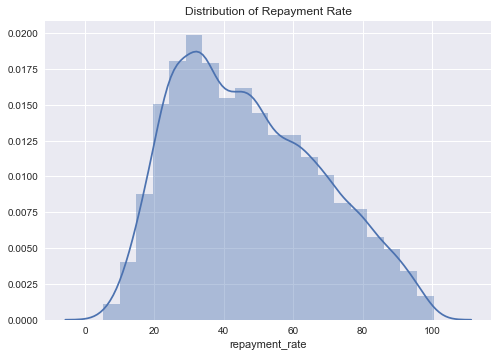

In [12]:
# plot histogram of repayment_rate
sns.set_context("notebook")
sns.set_style("darkgrid")
sns.distplot(df_label.repayment_rate, bins=20)
plt.title('Distribution of Repayment Rate');

To get a handle on the extent of missing data, we can plot the counts of missing data by column and row in both the training and test sets. We can see from the plot on the left that there's not an insignificant amount of feature with >20% missing values and some approaching 100% missing values.  We'll need a strategy to determine whether to impute these missing values or remove features.  There's also a group of instances that are missing most of their values in both the training and testing sets as shown in the plot on the right.  

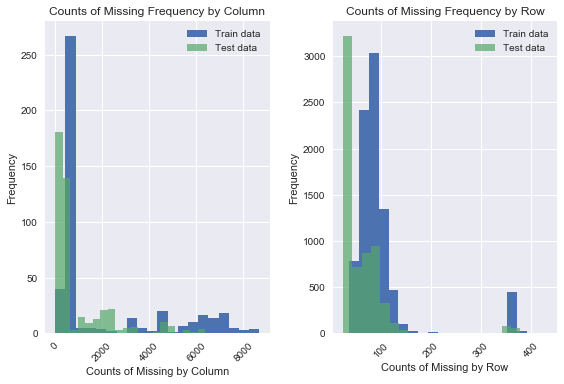

In [13]:
# Plots of missing values by column and row in both training and test sets.
plt.style.use('seaborn-notebook')
sns.set_style("darkgrid")
plt.subplot(121)
train=df_train.isnull().sum()  #try label for legend?
test=df_test.isnull().sum()
plt.hist(train, bins=20, label='Train data')
plt.hist(test, bins=20, label='Test data', alpha=0.7)
plt.title('Counts of Missing Frequency by Column')
plt.xticks(rotation=45)
plt.xlabel('Counts of Missing by Column')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
train=df_train.isnull().sum(axis=1)  #try label for legend?
test=df_test.isnull().sum(axis=1)
plt.hist(train, bins=20, label='Train data')
plt.hist(test, bins=20, label='Test data', alpha=0.7)
plt.title('Counts of Missing Frequency by Row')
plt.xlabel('Counts of Missing by Row')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show;

## 2. Exploratory Data Analysis

In this section, our goal is to get a better understanding of our data and explore how the features relate to eachother and to repayment rate.  We'll first take a look at categorical features.

### Categorical Features

In [14]:
plt.style.use('seaborn-notebook')
plt.style.context('ggplot');

# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
# plt.rcParams['font.size'] = 10
# plt.rcParams['axes.labelsize'] = 14
# plt.rcParams['axes.titlesize'] = 16
# plt.rcParams['axes.labelweight'] = 'bold'
# plt.rcParams['axes.titleweight'] = 'bold'
# 
# plt.rcParams['xtick.labelsize'] = 10
# plt.rcParams['ytick.labelsize'] = 10
# plt.rcParams['legend.fontsize'] = 10
# plt.rcParams['figure.titlesize'] = 12

The first thing we'll do is make a new dataframe that appends the repayment rate column onto the training set to facilitate plotting relationships between features and repayment rate.  Next we'll use the dtype to create a list of columns that would be considered categorical.  Python labels columns with strings as objects or 'O'.  After selecting only columns of dtype='O', we can then convert them a catagorical data type.


In [15]:
# Create dataframe of just categorical features
df_EDA = pd.concat([df_train, df_label], axis='columns')
EDAcat_cols = [x for x in df_EDA if df_EDA[x].dtype == np.dtype('O')]
df_EDA.loc[:, EDAcat_cols] = df_EDA.loc[:, EDAcat_cols].apply(lambda x: pd.Categorical(x))

We now have a list of categorical feature names that we can use to create some visualizations.

In [16]:
# Categorical column names
EDAcat_cols

['report_year',
 'school__carnegie_basic',
 'school__carnegie_size_setting',
 'school__carnegie_undergrad',
 'school__degrees_awarded_highest',
 'school__degrees_awarded_predominant',
 'school__institutional_characteristics_level',
 'school__locale',
 'school__main_campus',
 'school__men_only',
 'school__minority_serving_aanipi',
 'school__minority_serving_annh',
 'school__minority_serving_hispanic',
 'school__minority_serving_historically_black',
 'school__minority_serving_nant',
 'school__minority_serving_predominantly_black',
 'school__minority_serving_tribal',
 'school__online_only',
 'school__ownership',
 'school__region_id',
 'school__religious_affiliation',
 'school__state',
 'school__women_only']

Looking at repayment rate as it relates to school ownership, we can see see that Private for-profit schools have a lower repayment rate relative to Private nonprofit and Public schools.

In [17]:
# Counts of instances in school__ownership categories
df_EDA.school__ownership.value_counts()

Private for-profit    4325
Public                2332
Private nonprofit     2048
Name: school__ownership, dtype: int64

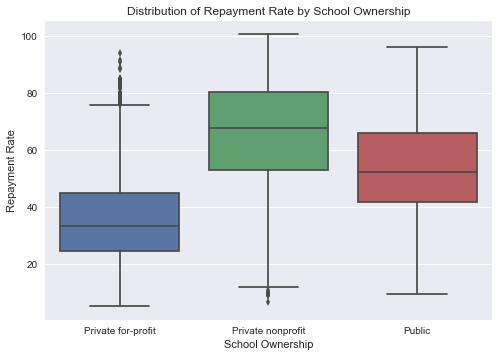

In [18]:
# Boxplot of repayment rate distribution in school__ownership categories
sns.set_style("darkgrid")
ax = sns.boxplot(x= 'school__ownership',
                y='repayment_rate',
                data=df_EDA)
ax.set(xlabel='School Ownership',
       ylabel='Repayment Rate',
       title ='Distribution of Repayment Rate by School Ownership')
plt.show();

The distribution of repayment rate by school region shows quite a bit of overlap between regions.  Of note is that there is only a single instance for US Service Schools.  We may consider removing this feature prior to building a model as it doesn't appear to add much predictive value.  

In [19]:
# Counts of instances in school__region_id categories
df_EDA.school__region_id.value_counts()

Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)    2050
Mid East (DE, DC, MD, NJ, NY, PA)                             1374
Great Lakes (IL, IN, MI, OH, WI)                              1365
Far West (AK, CA, HI, NV, OR, WA)                             1201
Southwest (AZ, NM, OK, TX)                                     896
Plains (IA, KS, MN, MO, NE, ND, SD)                            857
New England (CT, ME, MA, NH, RI, VT)                           531
Rocky Mountains (CO, ID, MT, UT, WY)                           344
Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)                 85
U.S. Service Schools                                             1
Name: school__region_id, dtype: int64

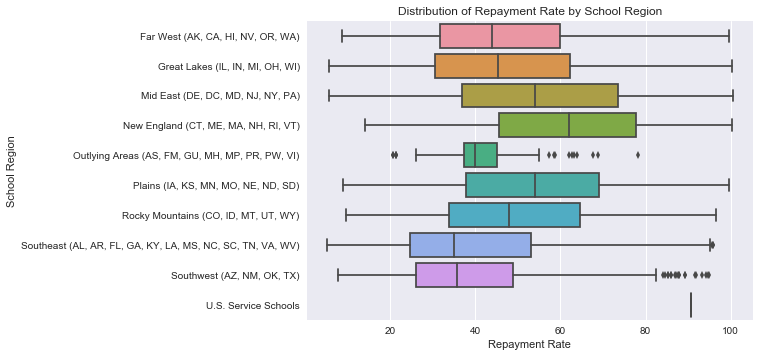

In [20]:
# Boxplot of repayment rate distribution in school__region categories
sns.set_style("darkgrid")
sns.set_style("darkgrid")
ax=sns.boxplot(x='repayment_rate',
            y= 'school__region_id',
                data=df_EDA)
ax.set(xlabel='Repayment Rate',
       ylabel='School Region',
       title='Distribution of Repayment Rate by School Region')
plt.show();

In [21]:
# Counts of instances in school__main_campus categories
df_EDA.school__main_campus.value_counts()

Main campus        6027
Not main campus    2678
Name: school__main_campus, dtype: int64

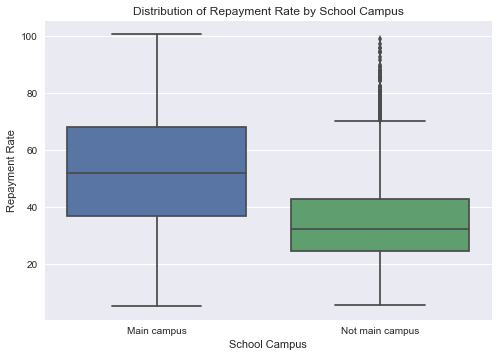

In [22]:
# Boxplot of repayment rate distribution in school__main_campus categories
sns.set_style("darkgrid")
ax = sns.boxplot(x= 'school__main_campus',
                y='repayment_rate',
                data=df_EDA)
ax.set(xlabel='School Campus',
       ylabel='Repayment Rate',
       title='Distribution of Repayment Rate by School Campus')
plt.show();

In [23]:
# Counts of instances in school__institutional_characteristics_level categories
df_EDA.school__institutional_characteristics_level.value_counts()

4-year              3941
2-year              2692
Less-than-2-year    2072
Name: school__institutional_characteristics_level, dtype: int64

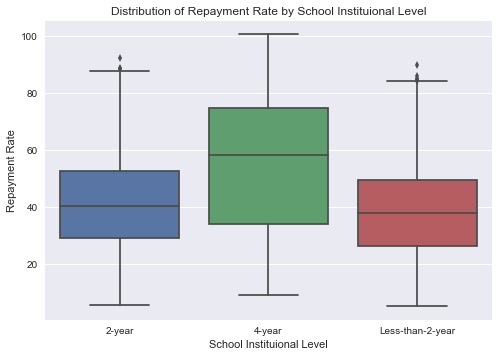

In [24]:
# Boxplot of repayment rate distribution in school__institutional_characteristics_level categories
sns.set_style("darkgrid")
ax = sns.boxplot(x= 'school__institutional_characteristics_level',
                y='repayment_rate',
                data=df_EDA)
ax.set(xlabel='School Instituional Level',
       ylabel='Repayment Rate',
       title='Distribution of Repayment Rate by School Instituional Level')
plt.show();

In [25]:
# Counts of instances in school__degrees_awarded_predominant categories
df_EDA.school__degrees_awarded_predominant.value_counts()

Predominantly certificate-degree granting    3391
Predominantly bachelor's-degree granting     2777
Predominantly associate's-degree granting    1972
Not classified                                513
Entirely graduate-degree granting              52
Name: school__degrees_awarded_predominant, dtype: int64

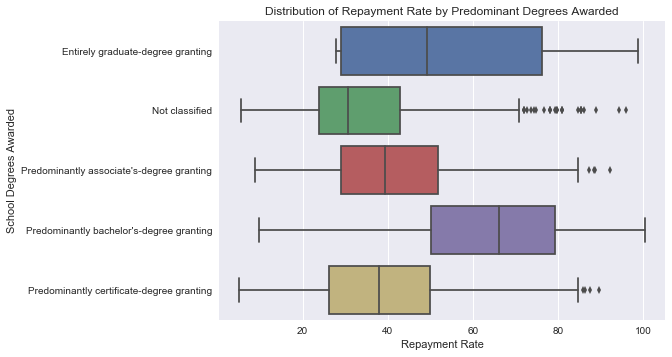

In [26]:
# Boxplot of repayment rate distribution in school__degrees_awarded_predominant categories
sns.set_style("darkgrid")
ax = sns.boxplot(y= 'school__degrees_awarded_predominant',
                x='repayment_rate',
                data=df_EDA)
ax.set(xlabel='Repayment Rate',
       ylabel='School Degrees Awarded',
       title='Distribution of Repayment Rate by Predominant Degrees Awarded')
plt.show();

In [27]:
# Counts of instances in school__degrees_awarded_highest categories
df_EDA.school__degrees_awarded_highest.value_counts()

Certificate degree     2491
Graduate degree        2339
Associate degree       2154
Bachelor's degree      1146
Non-degree-granting     575
Name: school__degrees_awarded_highest, dtype: int64

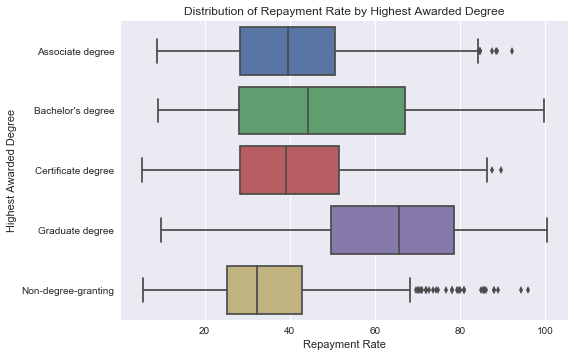

In [28]:
# Boxplot of repayment rate distribution in school__degrees_awarded_highest categories
sns.set_style("darkgrid")
ax = sns.boxplot(y= 'school__degrees_awarded_highest',
                x='repayment_rate',
                data=df_EDA)
ax.set(xlabel='Repayment Rate',
       ylabel='Highest Awarded Degree',
       title='Distribution of Repayment Rate by Highest Awarded Degree')
plt.show();

### Numeric

In [29]:
# Calculate correlation between features
pearson = df_EDA.corr(method='pearson')

In [30]:
# Select correlations of features with label 
corr_with_target = pearson.iloc[-1][:-1]

In [31]:
# attributes sorted from the most predictive
predictivity = corr_with_target[abs(corr_with_target).argsort()[::-1]]
predictivity[:30]

student__share_lowincome_0_30000                          -0.839633
student__share_highincome_75001_110000                     0.838509
student__demographics_avg_family_income                    0.823282
student__avg_dependent_income_2014dollars                  0.816341
student__share_dependent_lowincome_0_300000               -0.813804
student__share_dependent_highincome_110001plus             0.811990
student__demographics_median_family_income                 0.800772
student__share_highincome_110001plus                       0.795143
student__students_with_pell_grant                         -0.794821
student__share_dependent_highincome_75001_110000           0.794027
student__share_middleincome_48001_75000                    0.753407
student__share_firstgeneration_parents_somecollege         0.746319
student__demographics_first_generation                    -0.722747
admissions__act_scores_75th_percentile_math                0.717752
admissions__sat_scores_average_by_ope_id        

In [32]:
# Select correlations between features
attrs = round(pearson.iloc[:-1,:-1],2) # all except target
# only important correlations and not auto-correlations
threshold = 0.5

important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

In [33]:
# Top 30 examples of correlation between features
pd.set_option('max_colwidth', -1)
unique_important_corrs[:30]

,attribute pair,correlation
2276,"(aid__median_debt_number_income_greater_than_75000, student__share_firstgeneration_parents_middleschool)",-1.00
1720,"(admissions__sat_scores_25th_percentile_writing, completion__completion_rate_l4yr_150_nhpi)",-1.00
1569,"(admissions__sat_scores_midpoint_math, completion__completion_rate_l4yr_150_nhpi)",-1.00
2369,"(admissions__sat_scores_average_by_ope_id, cost__tuition_program_year)",-1.00
854,"(completion__completion_rate_l4yr_150_race_unknown, student__share_firstgeneration_parents_middleschool)",-1.00
3064,"(admissions__sat_scores_average_by_ope_id, cost__attendance_program_year)",-1.00
119,"(admissions__sat_scores_midpoint_writing, completion__completion_rate_l4yr_150_nhpi)",-1.00
1692,"(completion__completion_rate_l4yr_150_nonresident_alien, student__share_firstgeneration_parents_middleschool)",-1.00
355,"(student__demographics_first_generation, student__share_firstgeneration_parents_somecollege)",-1.00
2149,"(school__faculty_salary, student__share_firstgeneration_parents_middleschool)",-1.00


## 3. Preprocess Data

In [137]:
#remove features with >20% of data missing.
features_train=df_train.dropna(axis=1, thresh=6970)
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 3 to 15095
Columns: 317 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: float64(306), int64(1), object(10)
memory usage: 21.4+ MB


In [138]:
#remove instances with >300 count of data missing.
features_train=pd.concat([features_train, df_label], axis='columns')
features_train=features_train.dropna(axis=0, thresh=300)
df_label=pd.DataFrame(features_train['repayment_rate'])
features_train=features_train.drop('repayment_rate', axis='columns')

features_train.info()
df_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7625 entries, 3 to 15095
Columns: 317 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: float64(306), int64(1), object(10)
memory usage: 18.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7625 entries, 3 to 15095
Data columns (total 1 columns):
repayment_rate    7625 non-null float64
dtypes: float64(1)
memory usage: 119.1 KB


In [139]:
# Select only features in test set that are found in train set
cols_list=list(features_train)
features_test=df_test[cols_list]
features_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 15092
Columns: 317 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: float64(306), int64(1), object(10)
memory usage: 15.8+ MB


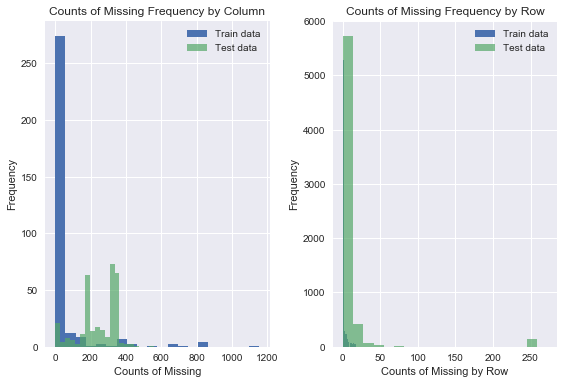

In [140]:
# Plots of missing counts by column and row
plt.style.use('seaborn-notebook')
plt.subplot(121)
train=features_train.isnull().sum()  #try label for legend?
test=features_test.isnull().sum()
plt.hist(train, bins=20, label='Train data')
plt.hist(test, bins=20, label='Test data', alpha=0.7)
plt.title('Counts of Missing Frequency by Column')
plt.xlabel('Counts of Missing')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
train=features_train.isnull().sum(axis=1)  
test=features_test.isnull().sum(axis=1)
plt.hist(train, bins=20, label='Train data')
plt.hist(test, bins=20, label='Test data', alpha=0.7)
plt.title('Counts of Missing Frequency by Row')
plt.xlabel('Counts of Missing by Row')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show;

In [141]:
# Check feature dtypes of preprcess training set
print('{} \n\nunique dtypes: {}'.format(features_train.info(),
                                        set([features_train[x].dtype for x in features_train])))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7625 entries, 3 to 15095
Columns: 317 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: float64(306), int64(1), object(10)
memory usage: 18.5+ MB
None 

unique dtypes: {dtype('int64'), dtype('O'), dtype('float64')}


In [142]:
# Redefine dtype column lists after initial preprocessing
fac_cols = [x for x in features_train if features_train[x].dtype == np.dtype('O')]
float_cols = [x for x in features_train if features_train[x].dtype == np.dtype('float64')]
int_cols = [x for x in features_train if features_train[x].dtype == np.dtype('int64')]

In [143]:
fac_cols

['report_year',
 'school__degrees_awarded_highest',
 'school__degrees_awarded_predominant',
 'school__institutional_characteristics_level',
 'school__main_campus',
 'school__online_only',
 'school__ownership',
 'school__region_id',
 'school__religious_affiliation',
 'school__state']

In [144]:
# Drop selected columns from train and test sets
drop_cols=['report_year',
           'school__online_only',
           'school__religious_affiliation',
           'school__state', 
           'school__region_id']

features_train=features_train.drop(drop_cols, axis=1)
features_test=features_test.drop(drop_cols, axis=1)

In [145]:
# Redefine list of categorical feature names
fac_cols = [x for x in features_train if features_train[x].dtype == np.dtype('O')]
fac_cols

['school__degrees_awarded_highest',
 'school__degrees_awarded_predominant',
 'school__institutional_characteristics_level',
 'school__main_campus',
 'school__ownership']

In [146]:
# convert objects into pandas categorical type
features_train.loc[:, fac_cols] = features_train.loc[:, fac_cols].apply(lambda x: pd.Categorical(x))
features_test.loc[:, fac_cols] = features_test.loc[:, fac_cols].apply(lambda x: pd.Categorical(x))

In [147]:
# Check for same feature count in train and test sets
features_train.info()
features_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7625 entries, 3 to 15095
Columns: 312 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: category(5), float64(306), int64(1)
memory usage: 18.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 15092
Columns: 312 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: category(5), float64(306), int64(1)
memory usage: 15.4 MB


In [148]:
# Check to see if there are categories in test set that are not in training set
def category_checker(X_train, X_test, cat_col):
    allowed_values = dict()
    for col in cat_col:
        allowed_values[col] = X_train[col].values.categories
    
    warn = False
    for col in cat_col:
        tmp = X_test[col].values.categories
        for val in tmp.values.tolist():
            if val not in allowed_values[col].values.tolist():
                print('WARNING: new categorical level encountered:', col, val)
                warn = True
    
    if not warn:
        print('No problems detected')

# we see that there are categories in the test set that do not appear 
# in the training set
category_checker(features_train, features_test, fac_cols)

No problems detected


In [149]:
# Create dummy variables for remaining categorical features
fac_dummies_train = pd.get_dummies(features_train.loc[:, fac_cols])
fac_dummies_test = pd.get_dummies(features_test.loc[:, fac_cols])

In [150]:
# what are the column indices? Remember, sk-learn uses numpy arrays,
# not pandas dataframes, so we can only index by column index
fac_col_names = fac_dummies_train.columns.values

In [151]:
fac_col_names

array(['school__degrees_awarded_highest_Associate degree',
       "school__degrees_awarded_highest_Bachelor's degree",
       'school__degrees_awarded_highest_Certificate degree',
       'school__degrees_awarded_highest_Graduate degree',
       'school__degrees_awarded_highest_Non-degree-granting',
       'school__degrees_awarded_predominant_Entirely graduate-degree granting',
       'school__degrees_awarded_predominant_Not classified',
       "school__degrees_awarded_predominant_Predominantly associate's-degree granting",
       "school__degrees_awarded_predominant_Predominantly bachelor's-degree granting",
       'school__degrees_awarded_predominant_Predominantly certificate-degree granting',
       'school__institutional_characteristics_level_2-year',
       'school__institutional_characteristics_level_4-year',
       'school__institutional_characteristics_level_Less-than-2-year',
       'school__main_campus_Main campus',
       'school__main_campus_Not main campus',
       'school_

In [152]:
# Create our final training and testing sets by merging the preprocessed categorical and numeric features.
df_trainTsf = fac_dummies_train.merge(features_train.loc[:, int_cols + float_cols],
                                      left_index = True,
                                      right_index = True)

df_testTsf=fac_dummies_test.merge(features_test.loc[:, int_cols + float_cols],
                                  left_index = True, 
                                  right_index = True)

In [153]:
# Write preprocessed training and test sets to CSV file.
df_trainTsf.to_csv('df_trainTsf.csv', index='row_id')
df_testTsf.to_csv('df_testTsf.csv', index='row_id')

In [154]:
# Check feature count of preprocessed training and test sets
df_trainTsf.info()
df_testTsf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7625 entries, 3 to 15095
Columns: 325 entries, school__degrees_awarded_highest_Associate degree to student__valid_dependency_status
dtypes: float64(306), int64(1), uint8(18)
memory usage: 18.4 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 15092
Columns: 325 entries, school__degrees_awarded_highest_Associate degree to student__valid_dependency_status
dtypes: float64(306), int64(1), uint8(18)
memory usage: 15.4 MB


In [155]:
# Prepare preprocessed training set for train_test_split
df_trainTsf=pd.read_csv('df_trainTsf.csv', index_col='row_id')
X=df_trainTsf.copy()
y=df_label.copy()

In [156]:
# Split the training set into training and test sets for model building
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=7811)

In [166]:
X_train.shape
X_test.shape

(6100, 325)

(1525, 325)

## Define Pipeline

In [158]:
# Processing pipeline
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(float_cols + int_cols)),
    ('imputer', Imputer(strategy='most_frequent', axis=0)),
    ('zero_var', ZeroVariance(near_zero=True)),
    ('correlation', FindCorrelation(threshold=0.95)),
    ('opt_scaler', OptionalStandardScaler(scale=False)),
])

# data pipeline for categorical features
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(fac_col_names)),
    ('zero_var', ZeroVariance(near_zero=False)),
    ('correlation', FindCorrelation(threshold=0.95)),
])

In [159]:
# Full Processing pipeline
prep_pipe = Pipeline([
        
    ('union', FeatureUnion(
        transformer_list = [
                    
            # pipeline to transform numeric features
            ('num_pipeline', num_pipeline),
                    
            # pipeline for categorical
            ('cat_pipeline', cat_pipeline),
        ],
                
        #other arguments for FeatureUnion        
        n_jobs = -1,
        transformer_weights = None
    )),
        
    # final correlation check
#     ('correlation', FindCorrelation(threshold=0.95)),
        
    # error checking
    ('checker', PipelineChecker()),
])          


## 4. Feature Selection

In [160]:
# Pass X_train through pipeline to process for feature selection 
X_train_pipe=prep_pipe.fit_transform(X_train)
X_train_pipe.shape
# reduces X_train to 150 instances (near_zero=True in num_pipeline)

(6100, 150)

In [161]:
# Define variables for numeric and categorical features in pipeline
nums=prep_pipe.get_params()['union__num_pipeline']
cat=prep_pipe.get_params()['union__cat_pipeline']

In [162]:
#-----------------------------------------------------------
#
# We can access steps in the fitted pipeline using get_params() method.
# We want to access the get_feature_names() method in each step, which 
# will allow us to filter an array of names at each step to correspond to 
# the features that are being selected
#
#-----------------------------------------------------------

# names from numeric pipeline
names_1a = nums.get_params()['zero_var'].get_feature_names(np.array(float_cols + int_cols))
names_2a = nums.get_params()['correlation'].get_feature_names(np.array(names_1a))

# names from categorical pipeline
names_1b = cat.get_params()['zero_var'].get_feature_names(np.array(fac_col_names))
names_2b= cat.get_params()['correlation'].get_feature_names(np.array(names_1b))

# final list of names
names_1c = (names_2a.tolist() + names_2b.tolist())


index=X_train.index

X_trainTsf=pd.DataFrame(X_train_pipe, columns=names_1c, index=index)
X_trainTsf.to_csv('X_trainTsf.csv')

In [3]:
# Confirm not missing values after passing through data preprocessing pipeline

X_trainTsf=pd.read_csv('X_trainTsf.csv', index_col='row_id')
X_trainTsf.isnull().sum().sum()
X_trainTsf.info()

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6100 entries, 7182 to 1816
Columns: 150 entries, academics__program_assoc_biological to school__ownership_Public
dtypes: float64(150)
memory usage: 7.0 MB


### Recursive Feature Elimination (RFE)

In [133]:
# Use Gradient Boosting Regressor as estimator in RFE with cross-validation
X_trainTsf=pd.read_csv('X_trainTsf.csv', index_col='row_id')

estimator = GradientBoostingRegressor(random_state=7811)

selector = RFECV(estimator,step=1,
                 scoring='neg_mean_squared_error', 
                 cv=5,
                 n_jobs=-1)

# selector=selector.fit(X_trainTsf, y_train.values.ravel())

# print("Optimal number of features : %d" % selector.n_features_)

# joblib.dump(selector, 'selector.pkl')

#Optimal number of features : 61

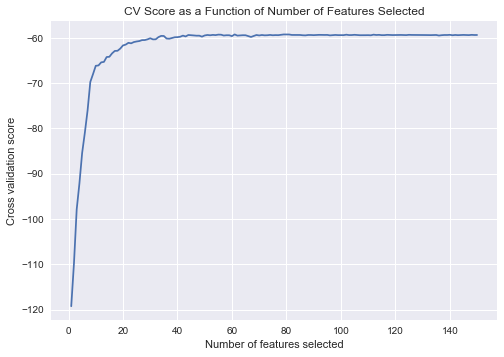

In [186]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.title('CV Score as a Function of Number of Features Selected')
plt.plot(range(1, len(selector2.grid_scores_) + 1), selector2.grid_scores_)
plt.show();

In [167]:
# Load the RFE model
selector2 = joblib.load('selector.pkl')

In [169]:
# Select features chosen by RFE
# X_trainTsf=pd.read_csv('X_trainTsf.csv', index_col='row_id')

X_trainRFE=X_trainTsf.loc[:,selector2.get_support()]
X_trainRFE.info()
X_trainRFE.to_csv('X_trainRFE.csv', index='row_id')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6100 entries, 7182 to 1816
Data columns (total 61 columns):
academics__program_assoc_legal                                                   6100 non-null float64
academics__program_bachelors_physical_science                                    6100 non-null float64
academics__program_certificate_lt_1_yr_business_marketing                        6100 non-null float64
academics__program_certificate_lt_1_yr_family_consumer_science                   6100 non-null float64
academics__program_certificate_lt_1_yr_humanities                                6100 non-null float64
academics__program_certificate_lt_2_yr_health                                    6100 non-null float64
academics__program_certificate_lt_2_yr_humanities                                6100 non-null float64
academics__program_percentage_english                                            6100 non-null float64
academics__program_percentage_health                              

In [170]:
# Redefine lists of column names for categorical and numeric features after RFE
RFE_list=list(X_trainRFE)

fac_cols=list(set(fac_dummies_train).intersection(RFE_list))
float_cols=list(set(float_cols).intersection(RFE_list))
int_cols=list(set(int_cols).intersection(RFE_list))

In [171]:
# Create array of categorical feature names
fac_col_RFE=X_trainRFE[fac_cols]

fac_col_names=fac_col_RFE.columns.values
fac_col_names

array([ "school__degrees_awarded_predominant_Predominantly associate's-degree granting",
       'school__institutional_characteristics_level_2-year',
       'school__ownership_Private for-profit',
       "school__degrees_awarded_predominant_Predominantly bachelor's-degree granting"], dtype=object)

In [172]:
# Filtered preprocessed training data by columns selected in RFE
df_trainRFE=df_trainTsf[RFE_list]
df_trainRFE.to_csv('df_trainRFE.csv', index='row_id')

In [173]:
# Filter preprocessed test data by columns selected in RFE
df_testFinal=df_testTsf[RFE_list]
df_testFinal.info()
df_testFinal.to_csv('df_testFinal.csv', index='row_id')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 15092
Data columns (total 61 columns):
academics__program_assoc_legal                                                   6063 non-null float64
academics__program_bachelors_physical_science                                    6077 non-null float64
academics__program_certificate_lt_1_yr_business_marketing                        6164 non-null float64
academics__program_certificate_lt_1_yr_family_consumer_science                   6034 non-null float64
academics__program_certificate_lt_1_yr_humanities                                6063 non-null float64
academics__program_certificate_lt_2_yr_health                                    6191 non-null float64
academics__program_certificate_lt_2_yr_humanities                                6062 non-null float64
academics__program_percentage_english                                            6221 non-null float64
academics__program_percentage_health                                

,academics__program_assoc_legal,academics__program_bachelors_physical_science,academics__program_certificate_lt_1_yr_business_marketing,academics__program_certificate_lt_1_yr_family_consumer_science,academics__program_certificate_lt_1_yr_humanities,academics__program_certificate_lt_2_yr_health,academics__program_certificate_lt_2_yr_humanities,academics__program_percentage_english,academics__program_percentage_health,academics__program_percentage_humanities,...,student__share_lowincome_0_30000,student__share_middleincome_30001_48000,student__share_middleincome_48001_75000,student__size,student__students_with_pell_grant,school__branches,school__degrees_awarded_predominant_Predominantly associate's-degree granting,school__degrees_awarded_predominant_Predominantly bachelor's-degree granting,school__institutional_characteristics_level_2-year,school__ownership_Private for-profit
row_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,...,0.787879,NaN,NaN,36.0,0.848485,1,0,0,0,0
1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.002200,0.358900,0.254300,...,0.639513,0.131359,0.121460,20190.0,0.805193,1,0,0,1,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.724498,0.139349,0.082129,721.0,0.854478,128,1,0,0,1
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.400934,0.486219,0.050822,...,0.252041,0.123863,0.091375,1002.0,0.383482,15,0,0,0,0
10,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.017464,0.584114,0.136365,...,0.865212,0.340632,0.079675,20248.0,0.627957,1,0,0,0,0


## 5. Model Selection

In [176]:
# Update pipeline with new feature name lists after RFE
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(float_cols + int_cols)),
    ('imputer', Imputer(strategy='most_frequent', axis=0)),
    ('zero_var', ZeroVariance(near_zero=True)),
    ('correlation', FindCorrelation(threshold=0.95)),
    ('opt_scaler', OptionalStandardScaler(scale=False)),
])

# data pipeline for categorical features
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(fac_col_names)),
    ('zero_var', ZeroVariance(near_zero=False)),
    ('correlation', FindCorrelation(threshold=0.95)),
])

In [177]:
# Update full pipline with updated num and cat_pipelines.
prep_pipe = Pipeline([
        
    ('union', FeatureUnion(
        transformer_list = [
                    
            # pipeline to transform numeric features
            ('num_pipeline', num_pipeline),
                    
            # pipeline for categorical
            ('cat_pipeline', cat_pipeline),
        ],
                
        #other arguments for FeatureUnion        
        n_jobs = -1,
        transformer_weights = None
    )),
        
    # final correlation check
#     ('correlation', FindCorrelation(threshold=0.95)),
     
    # error checking
    ('checker', PipelineChecker()),
])          

In [178]:
# Split data into train and test sets

# df_trainRFE=pd.read_csv('df_trainRFE.csv', index_col='row_id')
X=df_trainRFE.copy()
y=df_label.copy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=7811)

In [179]:
# Transform X_train with pipeline in preparation for model selection
X_train_new=prep_pipe.fit_transform(X_train)
X_train_new.shape

(6100, 61)

In [180]:
# Function to asses performance of regression models
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

#### Decision Tree Regressor

In [181]:
# Cross-validated decision tree regression model
tree_reg=DecisionTreeRegressor(random_state=7811)

scores = cross_val_score(tree_reg,
                         X_train_new,
                         y_train,
                         scoring='neg_mean_squared_error', 
                         cv=10,
                         n_jobs=-1)

tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [ 10.27152321  11.1876019   11.02379753  10.01274153  10.63153532
  10.74805159  10.05682277  10.62761227  10.21297815  10.95558272]
Mean: 10.5728246986
Standard deviation: 0.395627041015


#### Random Forest Regressor

In [182]:
# Cross-validated Random Forest regression model
rf_reg = RandomForestRegressor(random_state=7811)

scores = cross_val_score(rf_reg,
                         X_train_new,
                         y_train.values.ravel(),
                         scoring='neg_mean_squared_error', 
                         cv=10,
                         n_jobs=-1)

rf_rmse_scores = np.sqrt(-scores)
display_scores(rf_rmse_scores)

Scores: [ 7.22554317  8.23267184  8.18049365  7.21258037  7.22622839  7.3847518
  7.16328567  8.18729358  7.46113748  7.63641685]
Mean: 7.59104027684
Standard deviation: 0.420598954692


#### Extreme Gradient Regressor

In [183]:
# Cross-validated extreme gradient boosting regression model
xgb_reg=xgb(random_state=7811)

scores = cross_val_score(xgb_reg,
                         X_train_new,
                         y_train.values.ravel(),
                         scoring='neg_mean_squared_error', 
                         cv=10,
                         n_jobs=-1)

xgb_rmse_scores = np.sqrt(-scores)
display_scores(xgb_rmse_scores)

Scores: [ 7.54043326  7.99693905  7.97592813  7.6310481   7.42600355  7.59012374
  7.22867502  7.98733632  7.16891815  7.92964336]
Mean: 7.64750486885
Standard deviation: 0.298932751904


#### Extra Trees Regressor

In [184]:
# Cross-validated extra trees regression model
extree_reg = ExtraTreesRegressor(random_state=7811)

scores = cross_val_score(extree_reg,
                         X_train_new,
                         y_train.values.ravel(),
                         scoring='neg_mean_squared_error', 
                         cv=10,
                         n_jobs=-1)

extree_rmse_scores = np.sqrt(-scores)
display_scores(extree_rmse_scores)

Scores: [ 6.94518759  7.44216067  7.69689826  7.27074818  6.90320067  7.39776881
  6.89352781  7.62948771  6.87560272  7.31557852]
Mean: 7.2370160933
Standard deviation: 0.29765108195


#### K-Nearest Neighbor Regressor

In [185]:
# Cross-validated K-nearest neighbors regression model
knn_reg = KNeighborsRegressor()

scores = cross_val_score(knn_reg,
                         X_train_new,
                         y_train.values.ravel(),
                         scoring='neg_mean_squared_error', 
                         cv=10,
                         n_jobs=-1)

knn_rmse_scores = np.sqrt(-scores)
display_scores(knn_rmse_scores)

Scores: [ 8.65687251  9.1880046   9.27746002  8.73616976  8.38222997  8.41665063
  8.55042534  8.63855364  8.60940782  9.35876416]
Mean: 8.78145384453
Standard deviation: 0.340296865547


## 6. Model Tuning

#### XGB Regressor

In [84]:
# Append an extreme gradient boosting regressor estimator to full pipeline
xgb_est=copy.deepcopy(prep_pipe)

xgb_est.steps.append(('xgb_reg', xgb(random_state=7811)))

In [85]:
# List of xgb parameters to search with RandomizedSearchCV
n_iter=10
n_est=sp_randint(3000,6000)
learning_rate= [0.01, 0.05, 0.1, 0.5]
sub=[0.7, 0.8, 0.9]
max_depth=sp_randint(1,15)
alpha=[0, 10, 100]
child=sp_randint(1,15)

# Create dictionary of xgb parameters to be searched
parameters = dict(xgb_reg__n_estimators = n_est,
                xgb_reg__learning_rate = learning_rate,
                xgb_reg__subsample = sub,
                xgb_reg__max_depth = max_depth,
                xgb_reg__reg_alpha = alpha,
                xgb_reg__min_child_weight = child)

In [86]:
# Instantiate RandomizedSearchCV object
rand_search_xgb = RandomizedSearchCV(estimator = xgb_est,
                             param_distributions = parameters,
                             cv=5,
                             refit=True,
                             n_jobs=1,
                             scoring='neg_mean_squared_error',
                             random_state=7811)
# Fit RandomizedSearchCV objet to data
# rand_search_xgb.fit(X_train, y_train.values.ravel());
# joblib.dump(rand_search_xgb, 'rand_search_xgb.pkl')

In [87]:
# Load the saved model
rand_search_xgb = joblib.load('rand_search_xgb.pkl')

In [88]:
# Print the best paramaters and best score using best_params_ and best_score_ attributes
print('Chosen params: {}\n\nTrain Best -MSE score: {:0.3f}'.format(rand_search_xgb.best_params_,
                                                        rand_search_xgb.best_score_))

Chosen params: {'xgb_reg__learning_rate': 0.05, 'xgb_reg__max_depth': 6, 'xgb_reg__min_child_weight': 14, 'xgb_reg__n_estimators': 3725, 'xgb_reg__reg_alpha': 100, 'xgb_reg__subsample': 0.7}

Train Best -MSE score: -44.328


In [89]:
# Use xgb model to make predictionns on the unseen test data
# rand_search_xgb = joblib.load('rand_search_xgb.pkl')

y_pred=rand_search_xgb.predict(X_test)
print(rand_search_xgb.score(X_test, y_test))

mse_scores= mean_squared_error(y_test, y_pred)
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

-39.0957859024
6.25266230516


In [90]:
# rebuild features. 

# can access parts of the CV pipeline object like so:
num_pipe_xgb = rand_search_xgb.best_estimator_.get_params()['union__num_pipeline']
cat_pipe_xgb = rand_search_xgb.best_estimator_.get_params()['union__cat_pipeline']

# names from numerical pipeline
names_1a = num_pipe_xgb.get_params()['zero_var'].get_feature_names(np.array(float_cols + int_cols))
names_2a = num_pipe_xgb.get_params()['correlation'].get_feature_names(names_1a)

# names from categorical pipeline
names_1b = cat_pipe_xgb.get_params()['zero_var'].get_feature_names(np.array(fac_col_names))
names_2b = cat_pipe_xgb.get_params()['correlation'].get_feature_names(np.array(names_1b))

# Combined list of feature names
names_1c = np.array(names_2a.tolist() + names_2b.tolist())

In [91]:
# Get sorted list of feature importances from xgb regressor model
xgb_model = rand_search_xgb.best_estimator_.get_params()['xgb_reg']
xgb_importance = xgb_model.feature_importances_
x=sorted(list(zip(xgb_importance, names_1c)), key = lambda x: x[0], reverse=True)

In [92]:
# create a sorted dataframe of features and their importances
z = pd.DataFrame(data=x, columns=['importance', 'feature'])
imp_xgb = z.sort_values('importance', ascending=True).set_index('feature')
# imp_xgb.to_csv('imp_xgb.csv')

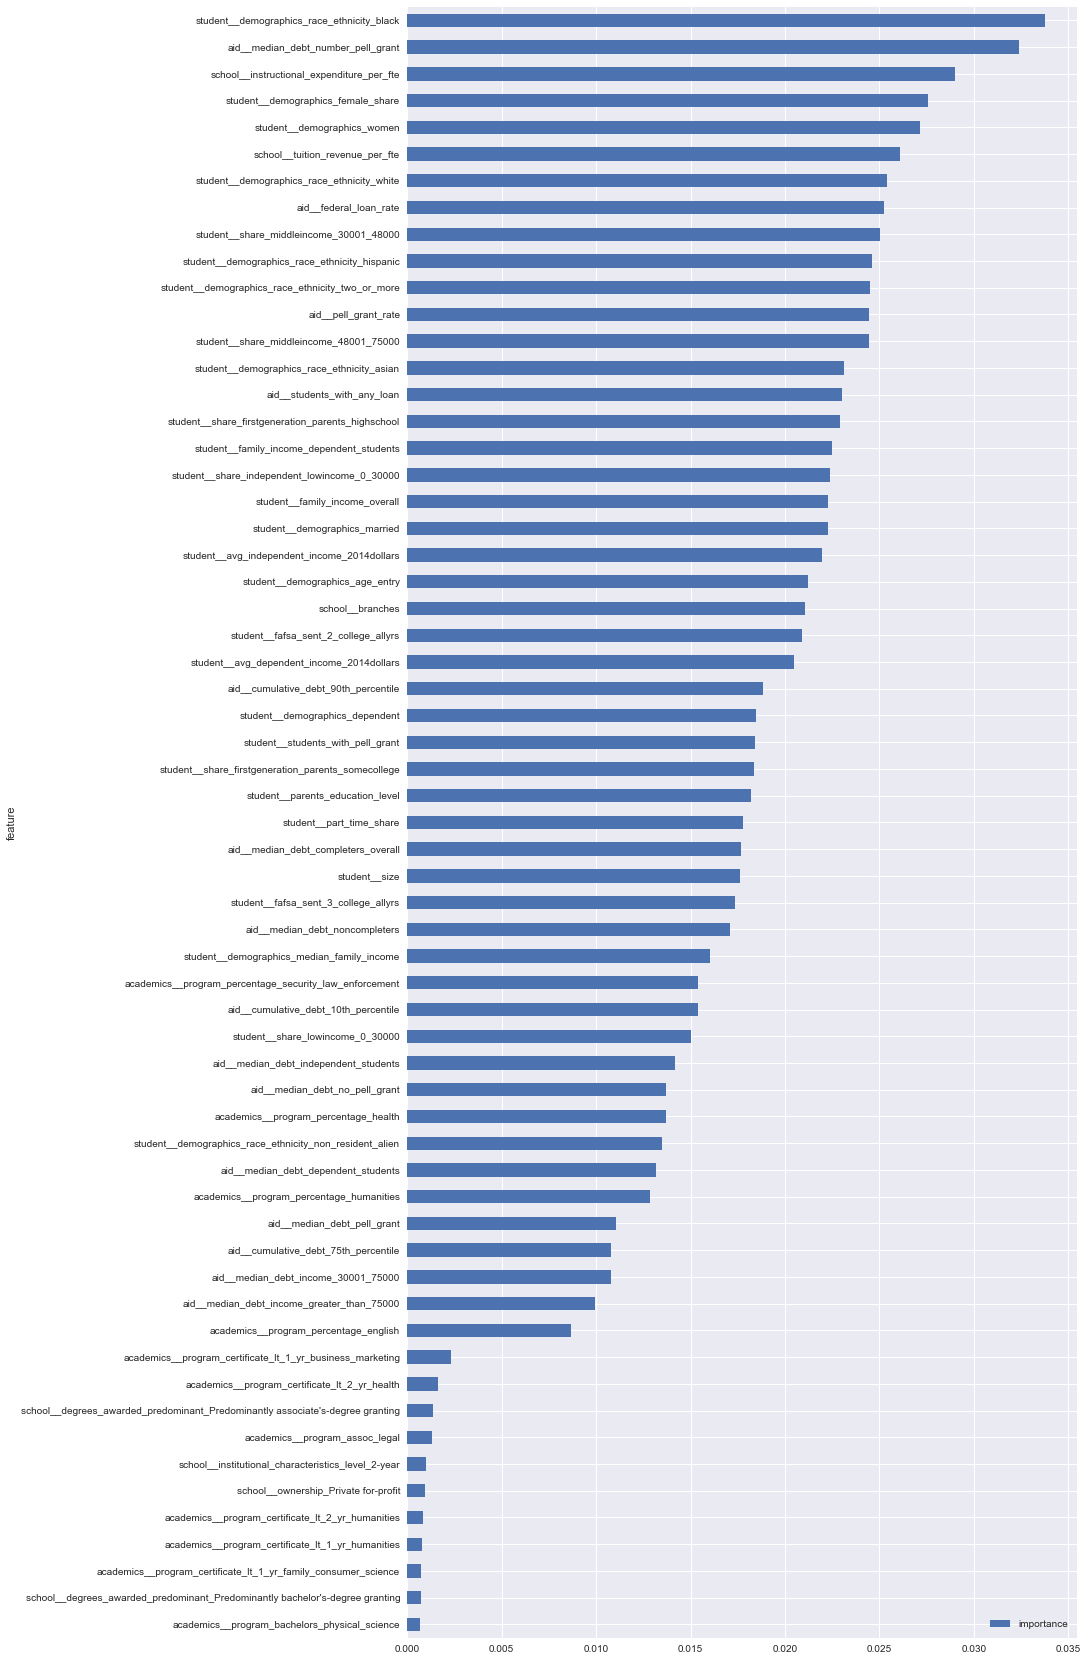

In [93]:
# Plot feature importances
imp_xgb=pd.read_csv('imp_xgb.csv', index_col='feature')
imp_xgb.plot(kind='barh', figsize=(12,30));

#### Random Forest

In [94]:
# Append a Random Forest regressor estimator to full pipeline
rf_est=copy.deepcopy(prep_pipe)
rf_est.steps.append(('rf_reg', RandomForestRegressor(random_state=7811)))

In [95]:
# List of Random Forest parameters to search with RandomizedSearchCV
n_iter=10
n_est=sp_randint(10,500)
parameters=dict(rf_reg__n_estimators=n_est)

# Instantiate RandomizedSearchCV object
rand_search_rf=RandomizedSearchCV(estimator = rf_est, 
                           param_distributions=parameters,
                           refit=True,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_iter=n_iter, 
                           random_state=7811)

# Fit RandomizedSearchCV objet to data
# rand_search_rf.fit(X_train, y_train.values.ravel());

In [96]:
# Save the fitted model
# joblib.dump(rand_search_rf, 'rand_search_rf.pkl')

In [ ]:
# Load the saved model
rand_search_rf = joblib.load('rand_search_rf.pkl')

In [97]:
# Print the best paramaters and best score using best_params_ and best_score_ attributes
print('Chosen params: {}\n\nTrain Best -MSE score: {:0.3f}'.format(rand_search_rf.best_params_,
                                                        rand_search_rf.best_score_))

Chosen params: {'rf_reg__n_estimators': 462}

Train Best -MSE score: -51.655


In [98]:
# Use Random Forest model to make predictionns on the unseen test data

# rand_search_rf = joblib.load('rand_search_rf.pkl')

y_pred=rand_search_rf.predict(X_test)
print(rand_search_rf.score(X_test, y_test))

mse_scores= mean_squared_error(y_test, y_pred)
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

-46.577415735
6.82476488496


In [99]:
# rebuild features. 

# can access parts of the CV pipeline object like so:
num_pipe_rf = rand_search_rf.best_estimator_.get_params()['union__num_pipeline']
cat_pipe_rf = rand_search_rf.best_estimator_.get_params()['union__cat_pipeline']

# names from numerical pipeline
names_1a = num_pipe_rf.get_params()['zero_var'].get_feature_names(np.array(float_cols + int_cols))
names_2a = num_pipe_rf.get_params()['correlation'].get_feature_names(names_1a)

# names from categorical pipeline
names_1b = cat_pipe_rf.get_params()['zero_var'].get_feature_names(np.array(fac_col_names))
names_2b = cat_pipe_rf.get_params()['correlation'].get_feature_names(np.array(names_1b))

# Combined list of feature names
names_1c = np.array(names_2a.tolist() + names_2b.tolist())

In [257]:
# rf_model = rand_search_rf.best_estimator_.get_params()['rf_reg']
# rf_importance = rf_model.feature_importances_
# x=sorted(list(zip( rf_importance, names_1c )), key = lambda x: x[0], reverse=True)
# x[:10]

[(0.51880954042479899, 'student__demographics_median_family_income'),
 (0.20029355148174527, 'student__share_lowincome_0_30000'),
 (0.042829127772227929, 'student__avg_dependent_income_2014dollars'),
 (0.028157007577710051, 'student__demographics_race_ethnicity_black'),
 (0.014052489983417698, 'aid__median_debt_number_pell_grant'),
 (0.011632040362411116, 'aid__median_debt_dependent_students'),
 (0.010249588573695014, 'aid__cumulative_debt_90th_percentile'),
 (0.0093938441045028926, 'student__share_firstgeneration_parents_somecollege'),
 (0.0090732688839534701, 'student__demographics_race_ethnicity_asian'),
 (0.0086282779853827044, 'aid__median_debt_independent_students')]

In [100]:
# Get sorted list of feature importances from Random Forest regressor model
z = pd.DataFrame(data=x, columns=['importance', 'feature'])
imp_rf = z.sort_values('importance', ascending=True).set_index('feature')
# imp_rf.to_csv('imp_rf.csv')

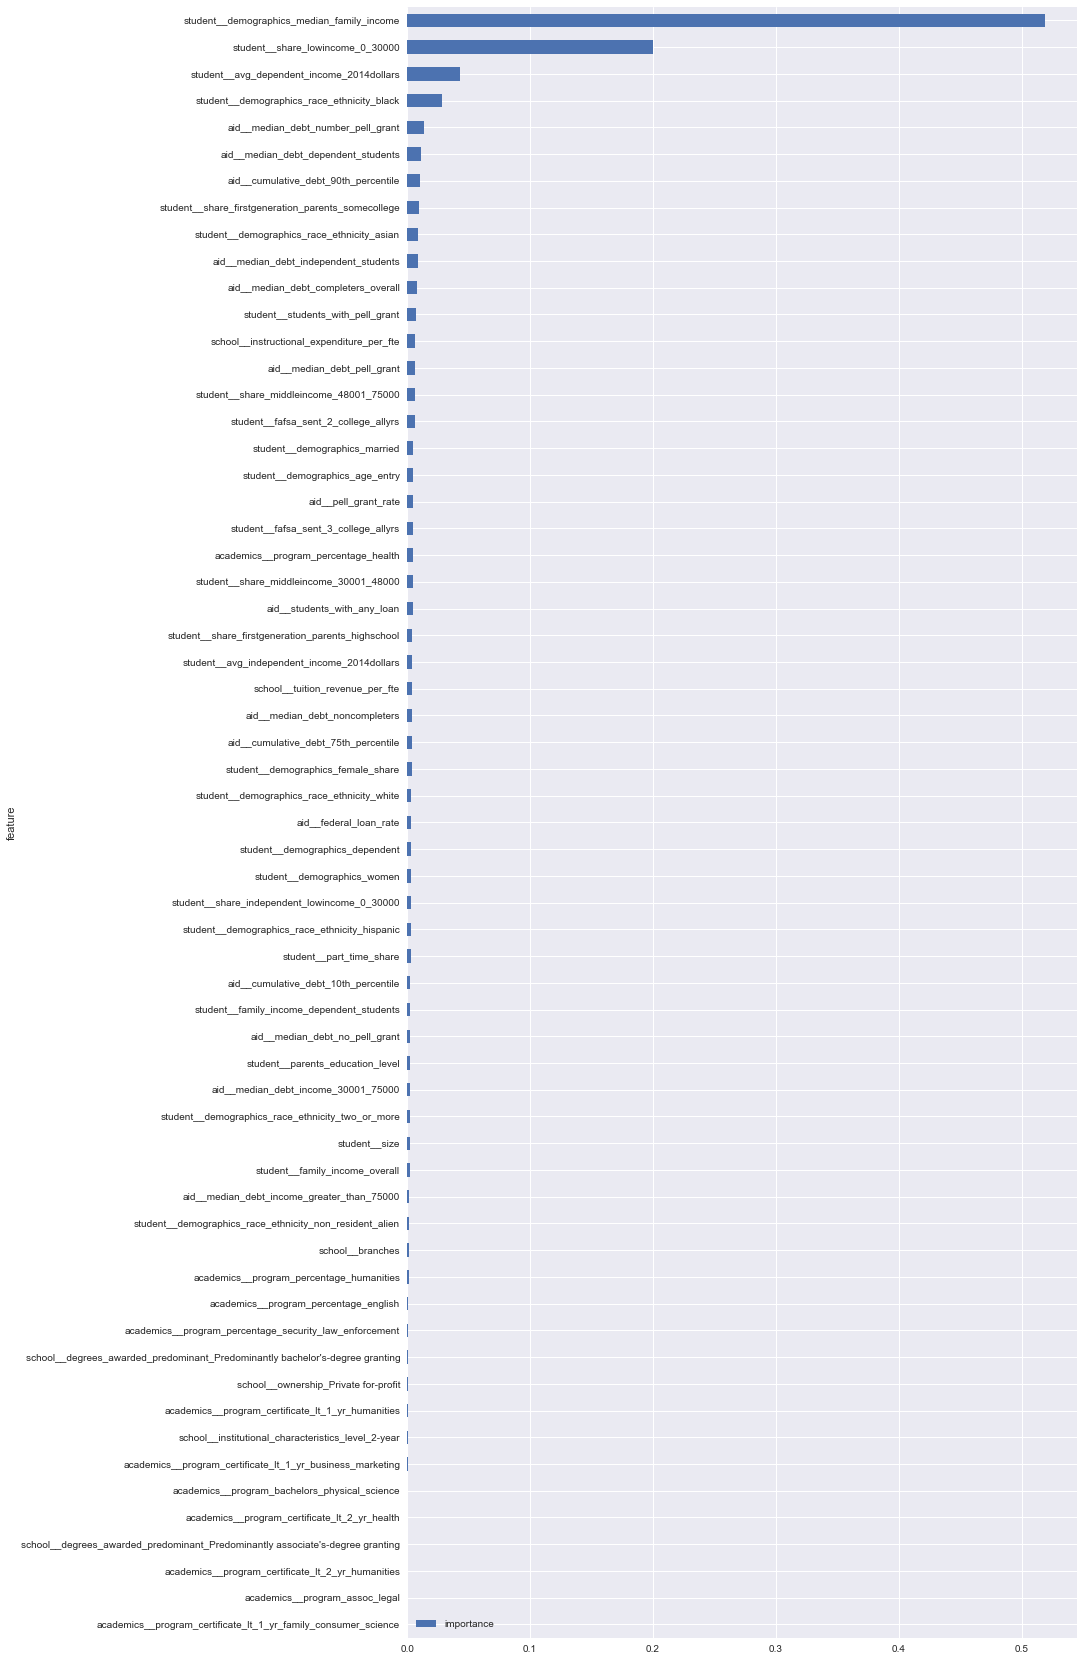

In [101]:
# Plot feature importances
imp_rf = pd.read_csv('imp_rf.csv',index_col='feature')
imp_rf.plot(kind='barh', figsize=(12,30));

#### Extra Trees Regressor

In [102]:
# Append an Extra Trees regressor estimator to full pipeline
exTree_est=copy.deepcopy(prep_pipe)

exTree_est.steps.append(('exTree_reg', ExtraTreesRegressor(random_state=7811)))

In [ ]:
# List of Extra Trees parameters to search with RandomizedSearchCV
n_iter=10
n_est=sp_randint(10,500)
max_feat=sp_randint(5,61)

# Create dictionary of Extra Trees parameters to be searched
parameters=dict(exTree_reg__n_estimators=n_est,
                exTree_reg__max_features=max_feat)

In [103]:
# Instantiate RandomizedSearchCV object
rand_search_exTree=RandomizedSearchCV(estimator = exTree_est, 
                           param_distributions=parameters,
                           refit=True,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_iter=n_iter, 
                           random_state=7811)

# Fit RandomizedSearchCV objet to data
# rand_search_exTree.fit(X_train, y_train.values.ravel());

In [ ]:
# Save the fitted model
# joblib.dump(rand_search_exTree, 'rand_search_exTree.pkl')

In [104]:
# Load the fitted model
rand_search_exTree = joblib.load('rand_search_exTree.pkl')

In [105]:
# Print the best paramaters and best score using best_params_ and best_score_ attributes
print('Chosen params: {}\n\nTrain Best -MSE score: {:0.3f}'.format(rand_search_exTree.best_params_,
                                                        rand_search_exTree.best_score_))

Chosen params: {'exTree_reg__max_features': 54, 'exTree_reg__n_estimators': 340}

Train Best -MSE score: -47.742


In [106]:
# Use Extra Trees model to make predictionns on the unseen test data
y_pred=rand_search_exTree.predict(X_test)
print(rand_search_exTree.score(X_test, y_test))

mse_scores= mean_squared_error(y_test, y_pred)
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

-40.5750076134
6.36985145928


In [107]:
# rebuild features. 

# can access parts of the CV pipeline object like so:
num_pipe_exTree = rand_search_exTree.best_estimator_.get_params()['union__num_pipeline']
cat_pipe_exTree = rand_search_exTree.best_estimator_.get_params()['union__cat_pipeline']

# names from numerical pipeline
names_1a = num_pipe_exTree.get_params()['zero_var'].get_feature_names(np.array(float_cols + int_cols))
names_2a = num_pipe_exTree.get_params()['correlation'].get_feature_names(names_1a)

# names from categorical pipeline
names_1b = cat_pipe_exTree.get_params()['zero_var'].get_feature_names(np.array(fac_col_names))
names_2b = cat_pipe_exTree.get_params()['correlation'].get_feature_names(np.array(names_1b))

# Combined list of feature names
names_1c = np.array(names_2a.tolist() + names_2b.tolist())

In [108]:
# Get sorted list of feature importances from Extra Trees regressor model
exTree_model = rand_search_exTree.best_estimator_.get_params()['exTree_reg']
exTree_importance = exTree_model.feature_importances_
x=sorted(list(zip( exTree_importance, names_1c )), key = lambda x: x[0], reverse=True)

In [109]:
# create a sorted dataframe of features and their importances
z = pd.DataFrame(data=x, columns=['importance', 'feature'])
imp_exTree = z.sort_values('importance', ascending=True).set_index('feature')
# imp_exTree.to_csv('imp_exTree.csv')

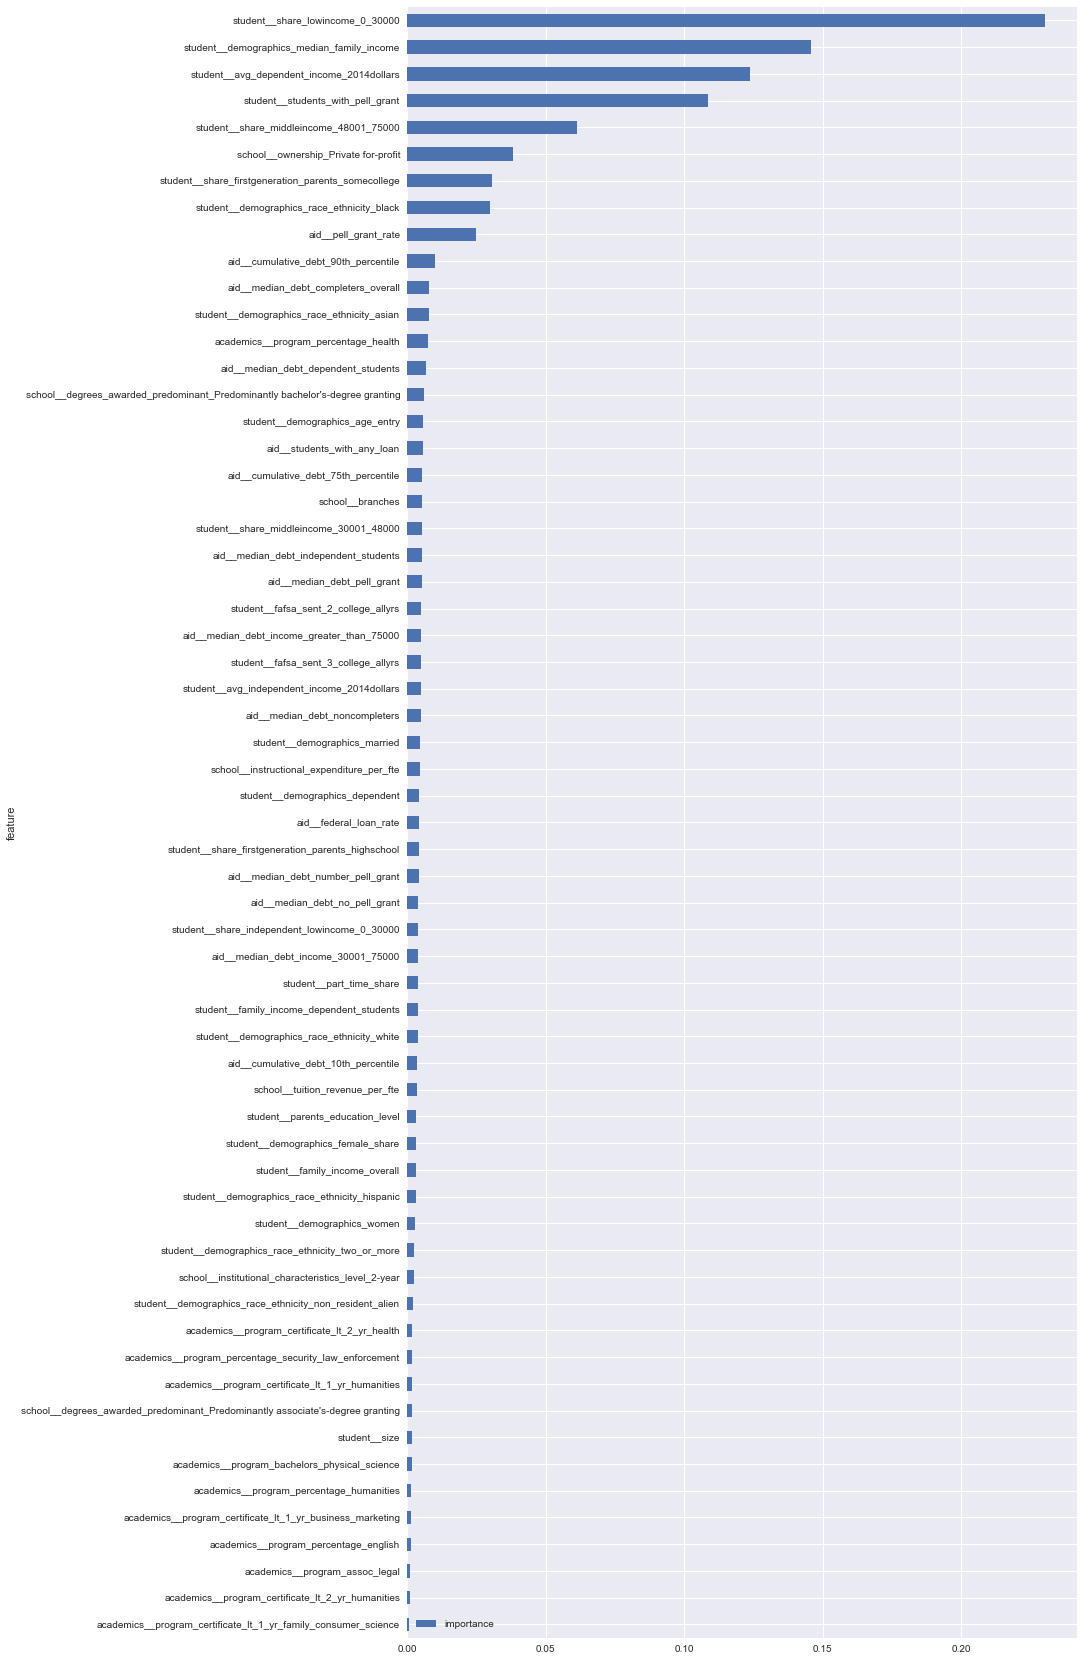

In [110]:
# Plot feature importances
imp_exTree=pd.read_csv('imp_exTree.csv',index_col='feature')
imp_exTree.plot(kind='barh', figsize=(12,30));


## 7. Prediction on Test Set for Submission

In [111]:
rand_search_xgb = joblib.load('rand_search_xgb.pkl')
df_testFinal = pd.read_csv('df_testFinal.csv', index_col='row_id')

In [112]:
test_index = df_testFinal.index.tolist()
repayment_rate_pred = rand_search_xgb.predict(df_testFinal)

In [113]:
##  Export Submission File  ##
pd.DataFrame({'row_id': test_index, 'repayment_rate' : repayment_rate_pred}).set_index('row_id').to_csv('Capstone_EJG.csv')